In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

from sklearn.metrics import recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import KFold
import numpy as np


pd.set_option("display.max_columns", 50)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_rows", None)

# Data Preparation


## Combine All Data Kata


In [31]:
def merge_csv_files_with_filename(directory):
    df_list = []

    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)

            df = pd.read_csv(file_path)

            df["label"] = str(os.path.splitext(filename)[0]).capitalize()

            df_list.append(df)

    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df


directory = "datasets/extraction-feature-default/Non-Merged"
combined_df = merge_csv_files_with_filename(directory)

combined_df.to_csv("datasets/extraction-feature-default/fix-data-new-alphabet.csv", index=False)

## Labelling Alphabet


In [32]:
alphabet_df = pd.read_csv("./datasets/extraction-feature-default/alphabet.csv")
alphabet_df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20
0,A_0.jpg,0.155182,0.729192,2.719984e-07,0.205288,0.735770,-0.017337,0.275075,0.718441,-0.035706,0.329495,0.709703,-0.055288,0.374989,0.702892,-0.076279,0.293241,0.639296,-0.046337,0.369748,0.612025,-0.084543,0.422023,0.597921,-0.107750,...,-0.119020,0.214076,0.620907,-0.074296,0.272353,0.658624,-0.120460,0.250701,0.692648,-0.112077,0.228995,0.689233,-0.097932,0.166513,0.630084,-0.089888,0.217268,0.657916,-0.120492,0.212754,0.687127,-0.110377,0.198819,0.687841,-0.097879
1,A_1.jpg,0.838807,0.719874,-2.164804e-07,0.771837,0.725273,-0.009544,0.705295,0.701828,-0.023455,0.662583,0.677778,-0.039253,0.628528,0.655313,-0.056163,0.697544,0.624706,-0.041077,0.612177,0.596289,-0.075613,0.560344,0.577005,-0.094528,...,-0.091366,0.778687,0.613676,-0.073650,0.714158,0.669719,-0.111475,0.741234,0.699804,-0.090671,0.767731,0.690158,-0.068801,0.825814,0.631450,-0.092105,0.772004,0.671297,-0.121461,0.778908,0.694842,-0.108882,0.794608,0.690194,-0.093175
2,A_10.jpg,0.581184,0.745845,-1.059189e-07,0.557238,0.751812,-0.004449,0.536100,0.740906,-0.010580,0.519795,0.737985,-0.017672,0.502753,0.742129,-0.025208,0.539090,0.672356,-0.008672,0.520708,0.655394,-0.017746,0.509604,0.638421,-0.024760,...,-0.023058,0.561821,0.671356,-0.017525,0.537792,0.710742,-0.025926,0.544868,0.730442,-0.019770,0.553987,0.724883,-0.015368,0.572253,0.688464,-0.023423,0.551785,0.715056,-0.030928,0.554675,0.728463,-0.027442,0.562592,0.725510,-0.023784
3,A_100.jpg,0.374870,0.759894,4.366655e-08,0.398134,0.758703,-0.007355,0.421602,0.743577,-0.017515,0.442338,0.741927,-0.028168,0.462645,0.746148,-0.039076,0.413038,0.671357,-0.023561,0.437463,0.646744,-0.040337,0.453789,0.627753,-0.050616,...,-0.047230,0.383540,0.671320,-0.034483,0.411728,0.706482,-0.052234,0.408348,0.740305,-0.046356,0.400300,0.747717,-0.039503,0.370315,0.691556,-0.041090,0.393848,0.708879,-0.052244,0.397180,0.733071,-0.047251,0.392820,0.741922,-0.041883
4,A_102.jpg,0.143311,0.835336,1.923219e-07,0.214950,0.844010,-0.012342,0.296637,0.814950,-0.027893,0.355519,0.792106,-0.046894,0.400802,0.763687,-0.066535,0.302602,0.724712,-0.037958,0.395459,0.693706,-0.078667,0.456062,0.675371,-0.102087,...,-0.119402,0.215821,0.706110,-0.072580,0.282703,0.770142,-0.123735,0.246608,0.804842,-0.112590,0.217682,0.791075,-0.096030,0.170938,0.723427,-0.091741,0.227759,0.771976,-0.123583,0.207771,0.800647,-0.111719,0.182577,0.788167,-0.097839


In [33]:
alphabet_df["label"] = alphabet_df["filename"].apply(lambda x: x[0])
alphabet_df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20,label
0,A_0.jpg,0.155182,0.729192,2.719984e-07,0.205288,0.735770,-0.017337,0.275075,0.718441,-0.035706,0.329495,0.709703,-0.055288,0.374989,0.702892,-0.076279,0.293241,0.639296,-0.046337,0.369748,0.612025,-0.084543,0.422023,0.597921,-0.107750,...,0.214076,0.620907,-0.074296,0.272353,0.658624,-0.120460,0.250701,0.692648,-0.112077,0.228995,0.689233,-0.097932,0.166513,0.630084,-0.089888,0.217268,0.657916,-0.120492,0.212754,0.687127,-0.110377,0.198819,0.687841,-0.097879,A
1,A_1.jpg,0.838807,0.719874,-2.164804e-07,0.771837,0.725273,-0.009544,0.705295,0.701828,-0.023455,0.662583,0.677778,-0.039253,0.628528,0.655313,-0.056163,0.697544,0.624706,-0.041077,0.612177,0.596289,-0.075613,0.560344,0.577005,-0.094528,...,0.778687,0.613676,-0.073650,0.714158,0.669719,-0.111475,0.741234,0.699804,-0.090671,0.767731,0.690158,-0.068801,0.825814,0.631450,-0.092105,0.772004,0.671297,-0.121461,0.778908,0.694842,-0.108882,0.794608,0.690194,-0.093175,A
2,A_10.jpg,0.581184,0.745845,-1.059189e-07,0.557238,0.751812,-0.004449,0.536100,0.740906,-0.010580,0.519795,0.737985,-0.017672,0.502753,0.742129,-0.025208,0.539090,0.672356,-0.008672,0.520708,0.655394,-0.017746,0.509604,0.638421,-0.024760,...,0.561821,0.671356,-0.017525,0.537792,0.710742,-0.025926,0.544868,0.730442,-0.019770,0.553987,0.724883,-0.015368,0.572253,0.688464,-0.023423,0.551785,0.715056,-0.030928,0.554675,0.728463,-0.027442,0.562592,0.725510,-0.023784,A
3,A_100.jpg,0.374870,0.759894,4.366655e-08,0.398134,0.758703,-0.007355,0.421602,0.743577,-0.017515,0.442338,0.741927,-0.028168,0.462645,0.746148,-0.039076,0.413038,0.671357,-0.023561,0.437463,0.646744,-0.040337,0.453789,0.627753,-0.050616,...,0.383540,0.671320,-0.034483,0.411728,0.706482,-0.052234,0.408348,0.740305,-0.046356,0.400300,0.747717,-0.039503,0.370315,0.691556,-0.041090,0.393848,0.708879,-0.052244,0.397180,0.733071,-0.047251,0.392820,0.741922,-0.041883,A
4,A_102.jpg,0.143311,0.835336,1.923219e-07,0.214950,0.844010,-0.012342,0.296637,0.814950,-0.027893,0.355519,0.792106,-0.046894,0.400802,0.763687,-0.066535,0.302602,0.724712,-0.037958,0.395459,0.693706,-0.078667,0.456062,0.675371,-0.102087,...,0.215821,0.706110,-0.072580,0.282703,0.770142,-0.123735,0.246608,0.804842,-0.112590,0.217682,0.791075,-0.096030,0.170938,0.723427,-0.091741,0.227759,0.771976,-0.123583,0.207771,0.800647,-0.111719,0.182577,0.788167,-0.097839,A


## Combine Kata + Karakter


In [34]:
kata_df = pd.read_csv("./datasets/extraction-feature-default/40-kata.csv")
kata_df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20,label
0,annotated_000008.jpg,0.268382,0.744393,6.803466e-08,0.280761,0.705737,-0.005387,0.332624,0.671905,-0.016733,0.390121,0.661721,-0.028926,0.434973,0.666202,-0.040863,0.342549,0.663610,-0.029849,0.407459,0.637570,-0.050515,0.452237,0.622324,-0.063267,...,0.379611,0.712160,-0.055015,0.450676,0.693179,-0.076478,0.430502,0.699660,-0.062527,0.402310,0.706136,-0.047598,0.393368,0.738127,-0.067984,0.447547,0.719188,-0.075345,0.427779,0.722588,-0.059219,0.401511,0.728171,-0.045366,Aku
1,annotated_000009.jpg,0.299242,0.721207,-2.027723e-09,0.309196,0.684461,-0.002298,0.356788,0.653571,-0.008736,0.410765,0.644649,-0.016566,0.451170,0.647947,-0.024366,0.371834,0.644341,-0.017050,0.431443,0.620406,-0.031288,0.470434,0.605882,-0.040382,...,0.414941,0.689099,-0.037593,0.474138,0.667484,-0.053275,0.455545,0.672951,-0.041676,0.431139,0.680876,-0.028847,0.429697,0.712821,-0.047924,0.474424,0.692056,-0.052460,0.456571,0.694199,-0.038174,0.434866,0.701169,-0.025463,Aku
2,annotated_000010.jpg,0.331698,0.707971,-5.837437e-08,0.337825,0.671227,0.002794,0.376913,0.641802,-0.000845,0.423526,0.634469,-0.007162,0.457788,0.640432,-0.013307,0.400992,0.628433,-0.006874,0.454656,0.606864,-0.016856,0.488799,0.594298,-0.023103,...,0.446112,0.668429,-0.028206,0.490581,0.654379,-0.038300,0.475732,0.661618,-0.028060,0.453976,0.667852,-0.017923,0.459798,0.690260,-0.038764,0.493672,0.677070,-0.038842,0.478665,0.681462,-0.025088,0.459762,0.686913,-0.013507,Aku
3,annotated_000011.jpg,0.353782,0.693124,-7.779809e-08,0.361236,0.657339,0.004973,0.398713,0.630149,0.002905,0.443103,0.623765,-0.001971,0.475117,0.630268,-0.006516,0.419666,0.617920,-0.003185,0.471352,0.597687,-0.010411,0.503044,0.587105,-0.014563,...,0.463501,0.655849,-0.023302,0.505082,0.642756,-0.029734,0.492441,0.649524,-0.019620,0.472496,0.655271,-0.010513,0.477001,0.676810,-0.033037,0.508419,0.664395,-0.030818,0.495135,0.668290,-0.017490,0.477694,0.673256,-0.006726,Aku
4,annotated_000012.jpg,0.377396,0.683487,-2.050306e-07,0.385351,0.645810,0.012018,0.420234,0.619822,0.014677,0.458285,0.613827,0.013094,0.486520,0.619899,0.011651,0.450731,0.606407,0.011326,0.495708,0.591359,0.012575,0.519797,0.584686,0.012652,...,0.495351,0.639933,-0.009315,0.525802,0.631792,-0.005976,0.514033,0.639046,0.001649,0.496737,0.645033,0.005914,0.508515,0.660503,-0.018599,0.533507,0.651758,-0.010427,0.521284,0.656520,0.001844,0.504741,0.662198,0.010487,Aku


In [35]:
# df_combined = pd.concat([alphabet_df, kata_df], ignore_index=True)
# df_combined.to_csv("./datasets/extraction-feature-default/fix-data.csv", index=False)

df_combined = pd.read_csv("./datasets/extraction-feature-default/fix-data.csv")
df_combined.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20,label
0,A_0.jpg,0.155182,0.729192,2.719984e-07,0.205288,0.735770,-0.017337,0.275075,0.718441,-0.035706,0.329495,0.709703,-0.055288,0.374989,0.702892,-0.076279,0.293241,0.639296,-0.046337,0.369748,0.612025,-0.084543,0.422023,0.597921,-0.107750,...,0.214076,0.620907,-0.074296,0.272353,0.658624,-0.120460,0.250701,0.692648,-0.112077,0.228995,0.689233,-0.097932,0.166513,0.630084,-0.089888,0.217268,0.657916,-0.120492,0.212754,0.687127,-0.110377,0.198819,0.687841,-0.097879,A
1,A_1.jpg,0.838807,0.719874,-2.164804e-07,0.771837,0.725273,-0.009544,0.705295,0.701828,-0.023455,0.662583,0.677778,-0.039253,0.628528,0.655313,-0.056163,0.697544,0.624706,-0.041077,0.612177,0.596289,-0.075613,0.560344,0.577005,-0.094528,...,0.778687,0.613676,-0.073650,0.714158,0.669719,-0.111475,0.741234,0.699804,-0.090671,0.767731,0.690158,-0.068801,0.825814,0.631450,-0.092105,0.772004,0.671297,-0.121461,0.778908,0.694842,-0.108882,0.794608,0.690194,-0.093175,A
2,A_10.jpg,0.581184,0.745845,-1.059189e-07,0.557238,0.751812,-0.004449,0.536100,0.740906,-0.010580,0.519795,0.737985,-0.017672,0.502753,0.742129,-0.025208,0.539090,0.672356,-0.008672,0.520708,0.655394,-0.017746,0.509604,0.638421,-0.024760,...,0.561821,0.671356,-0.017525,0.537792,0.710742,-0.025926,0.544868,0.730442,-0.019770,0.553987,0.724883,-0.015368,0.572253,0.688464,-0.023423,0.551785,0.715056,-0.030928,0.554675,0.728463,-0.027442,0.562592,0.725510,-0.023784,A
3,A_100.jpg,0.374870,0.759894,4.366655e-08,0.398134,0.758703,-0.007355,0.421602,0.743577,-0.017515,0.442338,0.741927,-0.028168,0.462645,0.746148,-0.039076,0.413038,0.671357,-0.023561,0.437463,0.646744,-0.040337,0.453789,0.627753,-0.050616,...,0.383540,0.671320,-0.034483,0.411728,0.706482,-0.052234,0.408348,0.740305,-0.046356,0.400300,0.747717,-0.039503,0.370315,0.691556,-0.041090,0.393848,0.708879,-0.052244,0.397180,0.733071,-0.047251,0.392820,0.741922,-0.041883,A
4,A_102.jpg,0.143311,0.835336,1.923219e-07,0.214950,0.844010,-0.012342,0.296637,0.814950,-0.027893,0.355519,0.792106,-0.046894,0.400802,0.763687,-0.066535,0.302602,0.724712,-0.037958,0.395459,0.693706,-0.078667,0.456062,0.675371,-0.102087,...,0.215821,0.706110,-0.072580,0.282703,0.770142,-0.123735,0.246608,0.804842,-0.112590,0.217682,0.791075,-0.096030,0.170938,0.723427,-0.091741,0.227759,0.771976,-0.123583,0.207771,0.800647,-0.111719,0.182577,0.788167,-0.097839,A


In [36]:
df_combined["label"].value_counts()

label
Siapa           1089
Dia              562
Maaf             513
Halo             512
Kerja            442
Tolong           413
Aku              384
Bapak            384
Besok            380
Bagaimana        377
Pagi             376
Kemarin          376
Kantor           370
Tidur            363
Jawab            362
Malam            354
Kalian           352
Nanti            347
Siang            346
T                334
H                331
S                330
L                328
F                326
Hari ini         326
B                324
K                319
J                318
Lusa             318
P                317
Lelah            314
W                312
Kamu             312
E                310
Sore             309
Sekarang         307
Kapan            306
X                304
V                298
N                298
Q                297
R                296
C                293
M                291
Z                288
I                287
D                283
A      

# Pre Modelling


In [37]:
df = pd.read_csv("./datasets/extraction-feature-default/fix-data-new-alphabet.csv")
df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20,label
0,30_02.mp4.jpg,0.373255,0.616804,-1.816693e-08,0.351409,0.619098,-0.004512,0.326864,0.612674,-0.010105,0.307963,0.623768,-0.017276,0.293887,0.636452,-0.024939,0.328161,0.541633,-0.004305,0.311378,0.508804,-0.012500,0.301490,0.486551,-0.018232,...,0.350869,0.528446,-0.013284,0.332941,0.541411,-0.024424,0.338056,0.568876,-0.021616,0.345777,0.577974,-0.017135,0.363655,0.531339,-0.019086,0.346986,0.541949,-0.024780,0.346088,0.565847,-0.021457,0.349835,0.577933,-0.017662,A
1,31_02.mp4.jpg,0.371592,0.618147,-7.931677e-09,0.351278,0.621315,-0.004522,0.326998,0.615042,-0.009841,0.308676,0.624672,-0.016663,0.294507,0.636551,-0.023989,0.327513,0.543382,-0.004697,0.310796,0.509730,-0.012680,0.300777,0.486683,-0.018029,...,0.350531,0.530556,-0.013226,0.333274,0.542141,-0.024683,0.337850,0.570507,-0.021919,0.345140,0.581721,-0.017250,0.363526,0.533584,-0.018684,0.347593,0.543018,-0.025123,0.345992,0.566985,-0.022130,0.348871,0.580206,-0.018322,A
2,32_02.mp4.jpg,0.372520,0.619292,-1.720842e-08,0.351281,0.622631,-0.004291,0.326855,0.616231,-0.009575,0.308177,0.625465,-0.016389,0.293758,0.636890,-0.023712,0.327645,0.544689,-0.004402,0.310426,0.511775,-0.012394,0.300228,0.489204,-0.017814,...,0.350592,0.531083,-0.013302,0.333079,0.544991,-0.024394,0.338098,0.572790,-0.021518,0.345896,0.582582,-0.016965,0.363374,0.534378,-0.018960,0.346926,0.545898,-0.024835,0.345969,0.569849,-0.021584,0.349764,0.581780,-0.017778,A
3,33_02.mp4.jpg,0.371660,0.621027,-1.646164e-08,0.351647,0.624135,-0.004406,0.327593,0.617648,-0.009803,0.309135,0.626462,-0.016717,0.294679,0.637640,-0.024188,0.327657,0.545324,-0.004660,0.310341,0.512614,-0.012782,0.299852,0.489837,-0.018068,...,0.350417,0.532472,-0.013554,0.332338,0.546751,-0.024823,0.337535,0.574887,-0.021358,0.345274,0.583908,-0.016346,0.363094,0.535971,-0.019247,0.346276,0.548768,-0.025441,0.346079,0.573076,-0.021892,0.350524,0.584136,-0.017736,A
4,34_02.mp4.jpg,0.371220,0.620898,-9.597101e-09,0.351270,0.624501,-0.004928,0.327509,0.618427,-0.010831,0.308873,0.627892,-0.018167,0.294208,0.638867,-0.026062,0.327365,0.546828,-0.005543,0.309563,0.514561,-0.014185,0.298696,0.491576,-0.019907,...,0.350030,0.533995,-0.014358,0.331961,0.548419,-0.025725,0.337124,0.576403,-0.022021,0.344927,0.584598,-0.016918,0.362715,0.537681,-0.020108,0.345726,0.550225,-0.026280,0.345551,0.574365,-0.022463,0.350243,0.584622,-0.018162,A


In [38]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
filename,22016,17475,65_02.mp4.jpg,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x_0,22016.0,NaN,NaN,NaN,0.451633,0.164387,0.005442,0.324672,0.455854,0.560816,0.958737
y_0,22016.0,NaN,NaN,NaN,0.646396,0.147365,0.025985,0.556888,0.656042,0.749919,1.058611
z_0,22016.0,NaN,NaN,NaN,0.0,0.0,-0.000001,-0.0,0.0,0.0,0.000002
x_1,22016.0,NaN,NaN,NaN,0.456285,0.148016,-0.00495,0.347408,0.464211,0.544241,0.930616
y_1,22016.0,NaN,NaN,NaN,0.621253,0.147864,0.076009,0.530063,0.634029,0.728308,1.005891
z_1,22016.0,NaN,NaN,NaN,-0.007756,0.013481,-0.11606,-0.01091,-0.004528,-0.000345,0.119151
x_2,22016.0,NaN,NaN,NaN,0.460063,0.135401,-0.017549,0.373773,0.469811,0.534405,0.963333
y_2,22016.0,NaN,NaN,NaN,0.591637,0.148331,0.070293,0.497523,0.605552,0.70112,0.98927
z_2,22016.0,NaN,NaN,NaN,-0.015894,0.020898,-0.163469,-0.022032,-0.010171,-0.00401,0.14765


In [39]:
df.shape

(22016, 65)

In [40]:
X = df.drop(columns=["filename", "label"])
y = df["label"]

display(X.head(), y.head())

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,...,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20
0,0.373255,0.616804,-1.816693e-08,0.351409,0.619098,-0.004512,0.326864,0.612674,-0.010105,0.307963,0.623768,-0.017276,0.293887,0.636452,-0.024939,0.328161,0.541633,-0.004305,0.311378,0.508804,-0.012500,0.301490,0.486551,-0.018232,0.294730,...,-0.023947,0.350869,0.528446,-0.013284,0.332941,0.541411,-0.024424,0.338056,0.568876,-0.021616,0.345777,0.577974,-0.017135,0.363655,0.531339,-0.019086,0.346986,0.541949,-0.024780,0.346088,0.565847,-0.021457,0.349835,0.577933,-0.017662
1,0.371592,0.618147,-7.931677e-09,0.351278,0.621315,-0.004522,0.326998,0.615042,-0.009841,0.308676,0.624672,-0.016663,0.294507,0.636551,-0.023989,0.327513,0.543382,-0.004697,0.310796,0.509730,-0.012680,0.300777,0.486683,-0.018029,0.294224,...,-0.022940,0.350531,0.530556,-0.013226,0.333274,0.542141,-0.024683,0.337850,0.570507,-0.021919,0.345140,0.581721,-0.017250,0.363526,0.533584,-0.018684,0.347593,0.543018,-0.025123,0.345992,0.566985,-0.022130,0.348871,0.580206,-0.018322
2,0.372520,0.619292,-1.720842e-08,0.351281,0.622631,-0.004291,0.326855,0.616231,-0.009575,0.308177,0.625465,-0.016389,0.293758,0.636890,-0.023712,0.327645,0.544689,-0.004402,0.310426,0.511775,-0.012394,0.300228,0.489204,-0.017814,0.293349,...,-0.023057,0.350592,0.531083,-0.013302,0.333079,0.544991,-0.024394,0.338098,0.572790,-0.021518,0.345896,0.582582,-0.016965,0.363374,0.534378,-0.018960,0.346926,0.545898,-0.024835,0.345969,0.569849,-0.021584,0.349764,0.581780,-0.017778
3,0.371660,0.621027,-1.646164e-08,0.351647,0.624135,-0.004406,0.327593,0.617648,-0.009803,0.309135,0.626462,-0.016717,0.294679,0.637640,-0.024188,0.327657,0.545324,-0.004660,0.310341,0.512614,-0.012782,0.299852,0.489837,-0.018068,0.292905,...,-0.022325,0.350417,0.532472,-0.013554,0.332338,0.546751,-0.024823,0.337535,0.574887,-0.021358,0.345274,0.583908,-0.016346,0.363094,0.535971,-0.019247,0.346276,0.548768,-0.025441,0.346079,0.573076,-0.021892,0.350524,0.584136,-0.017736
4,0.371220,0.620898,-9.597101e-09,0.351270,0.624501,-0.004928,0.327509,0.618427,-0.010831,0.308873,0.627892,-0.018167,0.294208,0.638867,-0.026062,0.327365,0.546828,-0.005543,0.309563,0.514561,-0.014185,0.298696,0.491576,-0.019907,0.291362,...,-0.023728,0.350030,0.533995,-0.014358,0.331961,0.548419,-0.025725,0.337124,0.576403,-0.022021,0.344927,0.584598,-0.016918,0.362715,0.537681,-0.020108,0.345726,0.550225,-0.026280,0.345551,0.574365,-0.022463,0.350243,0.584622,-0.018162


0    A
1    A
2    A
3    A
4    A
Name: label, dtype: object

## Transform Data


In [195]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# display(X_scaled, y_encoded)

from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_one_hot = to_categorical(y_encoded)

scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled = X

In [197]:
X.shape

(22016, 63)

In [199]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="standard_scaler_model.tflite")
interpreter.allocate_tensors()

# Mendapatkan detail input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Mendefinisikan fungsi untuk melakukan inferensi
def run_inference(input_data):
    input_index = input_details[0]['index']
    output_index = output_details[0]['index']
    
    # Menyediakan data input ke tensor
    interpreter.set_tensor(input_index, input_data)
    
    # Melakukan inferensi
    interpreter.invoke()
    
    # Mendapatkan hasil dari output tensor
    output_data = interpreter.get_tensor(output_index)
    return output_data

# Menyiapkan array untuk menyimpan hasil
results = []

# Iterasi melalui setiap baris dataframe
for index, row in X.iterrows():
    # Mengubah baris menjadi format yang sesuai dengan input model
    input_data = np.array([row.values], dtype=np.float32)
    
    # Jalankan inferensi dan simpan hasilnya
    result = run_inference(input_data)
    results.append(np.squeeze(result))

# Mengubah hasil menjadi dataframe untuk analisis lebih lanjut
X_scaled = pd.DataFrame(results)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,-0.481475,-0.200421,-0.280055,-0.711333,-0.013272,0.236831,-0.984159,0.143833,0.273099,-1.183088,0.331743,0.261461,-1.277798,0.473190,0.228106,-0.882742,-0.093857,0.537834,-1.080575,-0.135065,0.606687,-1.169128,-0.202717,0.624345,-1.203245,...,0.549672,-0.648304,-0.314910,0.611695,-0.878967,-0.155236,0.527110,-0.868653,-0.001106,0.590598,-0.803656,0.062853,0.647823,-0.537809,-0.404784,0.570091,-0.715013,-0.266184,0.569352,-0.740524,-0.108200,0.607564,-0.709860,-0.013558,0.625611
1,-0.491543,-0.191290,-0.245994,-0.712214,0.001760,0.236063,-0.983178,0.159841,0.285845,-1.177669,0.337748,0.284112,-1.273148,0.473834,0.256155,-0.887214,-0.082199,0.521270,-1.084793,-0.129015,0.601206,-1.174322,-0.201874,0.629594,-1.206874,...,0.575170,-0.650452,-0.301248,0.614111,-0.876662,-0.150657,0.519695,-0.870108,0.008784,0.581892,-0.808157,0.084823,0.644508,-0.538599,-0.390403,0.585024,-0.711078,-0.259474,0.559468,-0.741155,-0.101192,0.587937,-0.716215,0.000128,0.606208
2,-0.485920,-0.183510,-0.276865,-0.712191,0.010679,0.253357,-0.984223,0.167885,0.298671,-1.181466,0.343020,0.294258,-1.278767,0.476022,0.264342,-0.886302,-0.073486,0.533740,-1.087469,-0.115645,0.609887,-1.178320,-0.185713,0.635137,-1.213152,...,0.572185,-0.650065,-0.297837,0.610923,-0.878017,-0.132779,0.527961,-0.868356,0.022622,0.593426,-0.802818,0.089877,0.652757,-0.539526,-0.385320,0.574769,-0.715401,-0.241384,0.567780,-0.741310,-0.083550,0.603857,-0.710326,0.009604,0.622206
3,-0.491128,-0.171711,-0.274380,-0.709733,0.020874,0.244762,-0.978809,0.177463,0.287656,-1.174182,0.349645,0.282121,-1.271859,0.480872,0.250287,-0.886220,-0.069252,0.522838,-1.088083,-0.110163,0.598108,-1.181058,-0.181656,0.628577,-1.216335,...,0.590732,-0.651179,-0.288839,0.600403,-0.883137,-0.121738,0.515698,-0.872341,0.035334,0.598008,-0.807210,0.097653,0.670700,-0.541240,-0.375116,0.564124,-0.719608,-0.223354,0.550310,-0.740580,-0.063675,0.594877,-0.705308,0.023782,0.623437
4,-0.493795,-0.172587,-0.251536,-0.712268,0.023353,0.205791,-0.979423,0.182736,0.238021,-1.176178,0.359149,0.228494,-1.275391,0.488800,0.194916,-0.888240,-0.059227,0.485584,-1.093721,-0.097430,0.555480,-1.189475,-0.170510,0.581015,-1.227398,...,0.555205,-0.653640,-0.278976,0.566749,-0.885740,-0.111280,0.489868,-0.875253,0.044526,0.578935,-0.809667,0.101700,0.654130,-0.543554,-0.364166,0.532177,-0.723171,-0.214202,0.526128,-0.744069,-0.055734,0.578242,-0.707164,0.026707,0.610896


In [203]:
y.head()

0    A
1    A
2    A
3    A
4    A
Name: label, dtype: object

In [187]:
X.head()

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,...,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20
0,0.373255,0.616804,-1.816693e-08,0.351409,0.619098,-0.004512,0.326864,0.612674,-0.010105,0.307963,0.623768,-0.017276,0.293887,0.636452,-0.024939,0.328161,0.541633,-0.004305,0.311378,0.508804,-0.012500,0.301490,0.486551,-0.018232,0.294730,...,-0.023947,0.350869,0.528446,-0.013284,0.332941,0.541411,-0.024424,0.338056,0.568876,-0.021616,0.345777,0.577974,-0.017135,0.363655,0.531339,-0.019086,0.346986,0.541949,-0.024780,0.346088,0.565847,-0.021457,0.349835,0.577933,-0.017662
1,0.371592,0.618147,-7.931677e-09,0.351278,0.621315,-0.004522,0.326998,0.615042,-0.009841,0.308676,0.624672,-0.016663,0.294507,0.636551,-0.023989,0.327513,0.543382,-0.004697,0.310796,0.509730,-0.012680,0.300777,0.486683,-0.018029,0.294224,...,-0.022940,0.350531,0.530556,-0.013226,0.333274,0.542141,-0.024683,0.337850,0.570507,-0.021919,0.345140,0.581721,-0.017250,0.363526,0.533584,-0.018684,0.347593,0.543018,-0.025123,0.345992,0.566985,-0.022130,0.348871,0.580206,-0.018322
2,0.372520,0.619292,-1.720842e-08,0.351281,0.622631,-0.004291,0.326855,0.616231,-0.009575,0.308177,0.625465,-0.016389,0.293758,0.636890,-0.023712,0.327645,0.544689,-0.004402,0.310426,0.511775,-0.012394,0.300228,0.489204,-0.017814,0.293349,...,-0.023057,0.350592,0.531083,-0.013302,0.333079,0.544991,-0.024394,0.338098,0.572790,-0.021518,0.345896,0.582582,-0.016965,0.363374,0.534378,-0.018960,0.346926,0.545898,-0.024835,0.345969,0.569849,-0.021584,0.349764,0.581780,-0.017778
3,0.371660,0.621027,-1.646164e-08,0.351647,0.624135,-0.004406,0.327593,0.617648,-0.009803,0.309135,0.626462,-0.016717,0.294679,0.637640,-0.024188,0.327657,0.545324,-0.004660,0.310341,0.512614,-0.012782,0.299852,0.489837,-0.018068,0.292905,...,-0.022325,0.350417,0.532472,-0.013554,0.332338,0.546751,-0.024823,0.337535,0.574887,-0.021358,0.345274,0.583908,-0.016346,0.363094,0.535971,-0.019247,0.346276,0.548768,-0.025441,0.346079,0.573076,-0.021892,0.350524,0.584136,-0.017736
4,0.371220,0.620898,-9.597101e-09,0.351270,0.624501,-0.004928,0.327509,0.618427,-0.010831,0.308873,0.627892,-0.018167,0.294208,0.638867,-0.026062,0.327365,0.546828,-0.005543,0.309563,0.514561,-0.014185,0.298696,0.491576,-0.019907,0.291362,...,-0.023728,0.350030,0.533995,-0.014358,0.331961,0.548419,-0.025725,0.337124,0.576403,-0.022021,0.344927,0.584598,-0.016918,0.362715,0.537681,-0.020108,0.345726,0.550225,-0.026280,0.345551,0.574365,-0.022463,0.350243,0.584622,-0.018162


In [42]:
# Save Scaler
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [43]:
class_labels = label_encoder.classes_
class_labels

array(['A', 'Aku', 'Apa', 'B', 'Bagaimana', 'Baik', 'Bapak', 'Berapa',
       'Besok', 'C', 'D', 'Dia', 'Dimana', 'E', 'F', 'G', 'H', 'Halo',
       'Hari ini', 'I', 'Ibu', 'J', 'Jawab', 'K', 'Kalian', 'Kamu',
       'Kantor', 'Kapan', 'Kemana', 'Kemarin', 'Kerja', 'L', 'Lelah',
       'Lusa', 'M', 'Maaf', 'Makan', 'Malam', 'Mengapa', 'N', 'Nanti',
       'O', 'P', 'Pagi', 'Q', 'R', 'S', 'Sabar', 'Sakit', 'Sama - sama',
       'Sedih', 'Sekarang', 'Senang', 'Siang', 'Siapa', 'Sore', 'T',
       'Terima kasih', 'Tidur', 'Tolong', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [44]:
categories = label_encoder.classes_
categories  # Dictionary mapping dari label encoder
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

print("Label Mapping:", label_mapping)

Label Mapping: {0: 'A', 1: 'Aku', 2: 'Apa', 3: 'B', 4: 'Bagaimana', 5: 'Baik', 6: 'Bapak', 7: 'Berapa', 8: 'Besok', 9: 'C', 10: 'D', 11: 'Dia', 12: 'Dimana', 13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'Halo', 18: 'Hari ini', 19: 'I', 20: 'Ibu', 21: 'J', 22: 'Jawab', 23: 'K', 24: 'Kalian', 25: 'Kamu', 26: 'Kantor', 27: 'Kapan', 28: 'Kemana', 29: 'Kemarin', 30: 'Kerja', 31: 'L', 32: 'Lelah', 33: 'Lusa', 34: 'M', 35: 'Maaf', 36: 'Makan', 37: 'Malam', 38: 'Mengapa', 39: 'N', 40: 'Nanti', 41: 'O', 42: 'P', 43: 'Pagi', 44: 'Q', 45: 'R', 46: 'S', 47: 'Sabar', 48: 'Sakit', 49: 'Sama - sama', 50: 'Sedih', 51: 'Sekarang', 52: 'Senang', 53: 'Siang', 54: 'Siapa', 55: 'Sore', 56: 'T', 57: 'Terima kasih', 58: 'Tidur', 59: 'Tolong', 60: 'U', 61: 'V', 62: 'W', 63: 'X', 64: 'Y', 65: 'Z'}


# Split


In [200]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_one_hot, test_size=0.2, random_state=42
)

In [46]:
X_train.shape

(17612, 63)

In [47]:
# X_test_df = pd.DataFrame(X_test)
# y_test_df = pd.DataFrame(y_test)
# y_test_df['true_kategorik'] = label_encoder.inverse_transform(y_test)

# display(X_test_df.head(), y_test_df.head())
# X_test_df.to_csv('./datasets/extraction-feature-default/test-feature.csv', index=False)
# y_test_df.to_csv('./datasets/extraction-feature-default/test-label.csv', index=False)

X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
y_test_df["true_kategorik"] = label_encoder.inverse_transform(y_test.argmax(axis=1))
y_test_df = y_test_df[["true_kategorik"]]

display(X_test_df.head(), y_test_df.head())
X_test_df.to_csv("./datasets/extraction-feature-default/test-feature.csv", index=False)
y_test_df.to_csv("./datasets/extraction-feature-default/test-label.csv", index=False)

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,...,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20
369,0.796575,0.894907,-7.894628e-08,0.750916,0.895476,-0.010539,0.710127,0.883920,-0.026289,0.676869,0.882224,-0.042723,0.643304,0.888134,-0.060459,0.725412,0.803488,-0.026677,0.682354,0.792483,-0.047300,0.656453,0.776844,-0.062009,0.634997,...,-0.053593,0.769793,0.817719,-0.044936,0.715082,0.866614,-0.061991,0.733401,0.882741,-0.048455,0.752652,0.876048,-0.039507,0.786388,0.842089,-0.056654,0.743292,0.879984,-0.074876,0.755791,0.893046,-0.069635,0.772871,0.887559,-0.063726
6149,0.598849,0.720064,9.452850e-08,0.628096,0.721818,-0.002197,0.658725,0.746896,-0.009606,0.674849,0.796403,-0.018492,0.681852,0.841708,-0.026773,0.683226,0.708203,-0.008615,0.696763,0.787642,-0.019217,0.704177,0.826543,-0.025800,0.710875,...,-0.028691,0.662999,0.728386,-0.022048,0.671363,0.807979,-0.030776,0.658182,0.798733,-0.027287,0.655293,0.778030,-0.024025,0.649306,0.747285,-0.029847,0.655308,0.807676,-0.032932,0.645079,0.799084,-0.029366,0.641475,0.779538,-0.026578
12340,0.526470,0.659609,-5.558212e-08,0.512280,0.672088,-0.001944,0.488250,0.670436,-0.001745,0.473464,0.674036,-0.002524,0.461966,0.682380,-0.003098,0.490754,0.615257,0.003722,0.472162,0.626209,-0.000099,0.456079,0.634594,-0.004825,0.443034,...,-0.013101,0.494416,0.605780,-0.004102,0.472257,0.618218,-0.010549,0.455879,0.627910,-0.014543,0.442128,0.638235,-0.016386,0.494701,0.609512,-0.008897,0.472956,0.621458,-0.015185,0.459836,0.629766,-0.017624,0.449509,0.637975,-0.018563
6518,0.321723,0.795919,-3.082068e-07,0.352960,0.777904,-0.029934,0.379367,0.716598,-0.035437,0.380213,0.651238,-0.038672,0.371449,0.599178,-0.036078,0.412488,0.669568,0.002268,0.418877,0.609602,-0.016453,0.411235,0.621422,-0.026786,0.405576,...,-0.029471,0.363559,0.639774,0.016410,0.369393,0.592952,-0.008008,0.363387,0.622359,-0.018157,0.358896,0.652311,-0.013162,0.333232,0.629945,0.019271,0.335678,0.567921,0.011878,0.332908,0.530523,0.008568,0.331453,0.501105,0.011473
16720,0.489340,0.697044,-1.377792e-07,0.500648,0.661693,0.000184,0.507676,0.617267,-0.003084,0.513642,0.582449,-0.006911,0.521728,0.559622,-0.010413,0.497012,0.605424,-0.011895,0.476448,0.566815,-0.018055,0.475332,0.585258,-0.020274,0.481147,...,-0.018811,0.471779,0.632222,-0.017156,0.453839,0.597141,-0.020640,0.453254,0.611367,-0.017384,0.458155,0.625854,-0.015684,0.458897,0.647325,-0.019468,0.444943,0.617243,-0.022035,0.435410,0.598762,-0.021898,0.428506,0.583677,-0.022199


,true_kategorik
0,A
1,Hari ini
2,Malam
3,I
4,Sekarang


In [48]:
y_test_df[y_test_df["true_kategorik"] == "Q"].head()

,true_kategorik
21,Q
226,Q
324,Q
349,Q
428,Q


In [49]:
total_class = y_train.shape[1]
total_class

66

# Modelling


In [201]:
print(X_train.shape[1:])
print(X_train.shape)
print(y_train.shape)

print(X_train[:1])
print(y_train[:1])

(63,)
(17612, 63)
(17612, 66)
           0         1         2         3         4         5         6   \
460 -1.116397  0.666861  0.006806 -1.185758  0.574031  0.171474 -0.941907   

           7         8         9         10       11        12        13  \
460  0.544352 -0.046783 -0.558714  0.583972 -0.16926 -0.219308  0.665494   

           14       15        16        17        18        19        20  \
460 -0.242295 -0.78341  0.719285 -0.540296 -0.384998  0.706717 -0.548314   

           21        22        23        24  ...        38        39  \
460 -0.071413  0.667624 -0.540367  0.190754  ... -0.757663 -0.465607   

           40       41        42        43        44       45        46  \
460  0.874865 -1.13389 -0.064958  0.796694 -0.962927 -0.21388  0.791686   

           47        48        49        50        51        52        53  \
460 -0.586016 -0.404072  0.814444 -0.234628 -0.356337  0.919627 -1.244246   

           54        55        56        57       58      

# Create Standard Scaler Model Manual

In [163]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout, Layer, Input, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [170]:
# Menghitung mean dan standar deviasi manual
mean = np.mean(X_train, axis=0).astype(np.float32)
std = np.std(X_train, axis=0).astype(np.float32)

# Buat model TensorFlow
class StandardScalerModel(tf.keras.Model):
    def __init__(self, mean, std):
        super(StandardScalerModel, self).__init__()
        self.mean = tf.Variable(mean, trainable=False)
        self.std = tf.Variable(std, trainable=False)

    @tf.function(input_signature=[tf.TensorSpec(shape=[None, X_train.shape[1]], dtype=tf.float32)])
    def call(self, inputs):
        return (inputs - self.mean) / self.std

# Inisialisasi model
model = StandardScalerModel(mean, std)

# Simpan model ke format SavedModel
tf.saved_model.save(model, 'standard_scaler_model')

# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('standard_scaler_model')
tflite_model = converter.convert()

# Simpan model TFLite ke file
with open('standard_scaler_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model TFLite saved as 'standard_scaler_model.tflite'")

INFO:tensorflow:Assets written to: standard_scaler_model\assets


INFO:tensorflow:Assets written to: standard_scaler_model\assets


Model TFLite saved as 'standard_scaler_model.tflite'


In [271]:
X_df = pd.DataFrame(X_scaled)
y_df = pd.DataFrame(y_one_hot)

In [272]:
X_df.to_csv('ready-train.csv', index=False)
y_df.to_csv('ready-y.csv', index=False)

In [266]:
model.save('standard_scaler_model.h5')

c:\Users\whisn\anaconda3\envs\bangkitcourse\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [181]:
# Memuat model TFLite
interpreter = tf.lite.Interpreter(model_path="standard_scaler_model.tflite")
interpreter.allocate_tensors()

# Mendapatkan detail input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Menampilkan detail input dan output
print(input_details)
print(output_details)


# Data baru yang ingin Anda standarisasi
new_data = np.array([np.array(X_train.iloc[1])],
                    dtype=np.float32)

# Menyiapkan input tensor
input_index = input_details[0]['index']
interpreter.set_tensor(input_index, new_data)

# Melakukan inferensi
interpreter.invoke()

# Mengambil hasil dari output tensor
output_index = output_details[0]['index']
scaled_data = interpreter.get_tensor(output_index)

print("data before scaled", np.array(X_train.iloc[1]))
print("Scaled Data: ", scaled_data)

[{'name': 'serving_default_inputs:0', 'index': 0, 'shape': array([ 1, 63]), 'shape_signature': array([-1, 63]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 4, 'shape': array([ 1, 63]), 'shape_signature': array([-1, 63]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
data before scaled [ 3.65628630e-01  6.73745453e-01  1.16488434e-06  4.00290042e-01
  6.44802451e-01 -8.59449208e-02  4.06922549e-01  5.67034662e-01
 -1.19955830e-01  3.80750567e-01  4.97966826e-01 -1.44968778e-01
  3.66938651e-01  4.33499247e-01 -1.65957779e-01  4.12922770e-01
  4.29389328e-01 -6.33223206e-02  4.27195370e-01  3.17258537

Epoch 1/100
551/551 [==============================] - 2s 3ms/step - loss: 2.5121 - accuracy: 0.4100 - val_loss: 1.3386 - val_accuracy: 0.6617
Epoch 2/100
551/551 [==============================] - 1s 1ms/step - loss: 1.0155 - accuracy: 0.7292 - val_loss: 0.7360 - val_accuracy: 0.8009
Epoch 3/100
551/551 [==============================] - 1s 1ms/step - loss: 0.7044 - accuracy: 0.8041 - val_loss: 0.5684 - val_accuracy: 0.8465
Epoch 4/100
551/551 [==============================] - 1s 1ms/step - loss: 0.5721 - accuracy: 0.8375 - val_loss: 0.4636 - val_accuracy: 0.8769
Epoch 5/100
551/551 [==============================] - 1s 1ms/step - loss: 0.4937 - accuracy: 0.8569 - val_loss: 0.4238 - val_accuracy: 0.8885
Epoch 6/100
551/551 [==============================] - 1s 1ms/step - loss: 0.4492 - accuracy: 0.8664 - val_loss: 0.3775 - val_accuracy: 0.9010
Epoch 7/100
551/551 [==============================] - 1s 2ms/step - loss: 0.4136 - accuracy: 0.8788 - val_loss: 0.3541 - val_accuracy: 0.9069

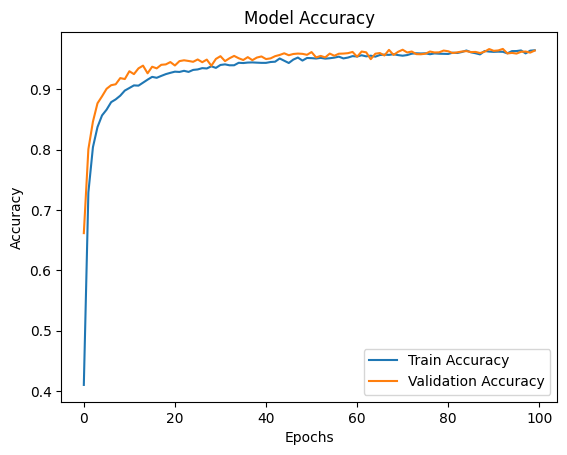

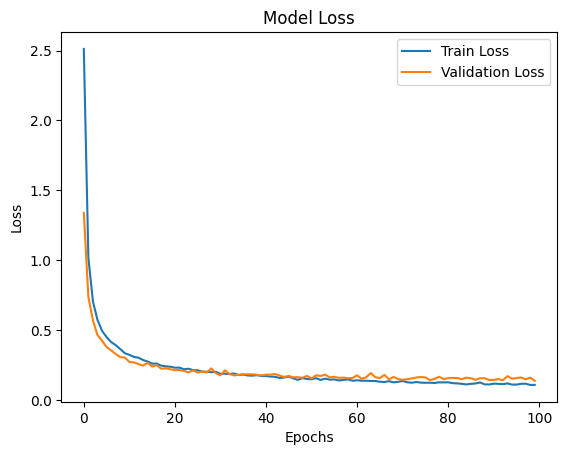

In [206]:

# Define the model
model = Sequential([
    Input(shape=X_train.shape[1:]),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dense(32, activation="relu"),
    Dense(total_class, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(
    # X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)
    X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)
)

# Visualisasi akurasi
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Visualisasi kerugian
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Save and Teest Load Model

In [219]:
model_name = "19-06-2024-0219am"
model_path = f"{model_name}.h5"
model.save(model_path)
print(model.summary())

# Memuat kembali model tanpa custom_objects
model_load = tf.keras.models.load_model(model_path)
# model_load = tf.keras.models.load_model(model_path, custom_objects={'CustomStandardScaler': CustomStandardScaler})
# # model_load = tf.keras.models.load_model(model_path, custom_objects={'CustomNormalization': CustomNormalization})
# print(model_load.summary())

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open(f"{model_name}.tflite", "wb") as f:
    f.write(tflite_model)

# Load the TFLite model and check for errors
interpreter = tf.lite.Interpreter(model_path=f"{model_name}.tflite")
interpreter.allocate_tensors()

print("Model loaded successfully with no errors.")

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 64)                4096      
                                                                 
 batch_normalization_6 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_84 (Dense)            (None, 32)                2080      
                                                                 
 dense_85 (Dense)            (None, 66)                2178      
                                                                 
Total params: 8610 (33.63 KB)
Trainable params: 8482 (33.13 KB)


Non-trainable params: 128 (512.00 Byte)
_________________________________________________________________


c:\Users\whisn\anaconda3\envs\bangkitcourse\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


None
INFO:tensorflow:Assets written to: C:\Users\whisn\AppData\Local\Temp\tmpvsrejp_l\assets


INFO:tensorflow:Assets written to: C:\Users\whisn\AppData\Local\Temp\tmpvsrejp_l\assets


Model loaded successfully with no errors.


# Test Distribusi Akurasi Per Kelas


In [211]:
test_feat_df = pd.read_csv("./datasets/extraction-feature-default/test-feature.csv")
test_label_df = pd.read_csv("./datasets/extraction-feature-default/test-label.csv")

display(test_feat_df.head(), test_label_df.head())

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,...,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20
0,0.796575,0.894907,-7.894628e-08,0.750916,0.895476,-0.010539,0.710127,0.883920,-0.026289,0.676869,0.882224,-0.042723,0.643304,0.888134,-0.060459,0.725412,0.803488,-0.026677,0.682354,0.792483,-0.047300,0.656453,0.776844,-0.062009,0.634997,...,-0.053593,0.769793,0.817719,-0.044936,0.715082,0.866614,-0.061991,0.733401,0.882741,-0.048455,0.752652,0.876048,-0.039507,0.786388,0.842089,-0.056654,0.743292,0.879984,-0.074876,0.755791,0.893046,-0.069635,0.772871,0.887559,-0.063726
1,0.598849,0.720064,9.452850e-08,0.628096,0.721818,-0.002197,0.658725,0.746896,-0.009606,0.674849,0.796403,-0.018492,0.681852,0.841708,-0.026773,0.683226,0.708203,-0.008615,0.696763,0.787642,-0.019217,0.704177,0.826543,-0.025800,0.710875,...,-0.028691,0.662999,0.728386,-0.022048,0.671363,0.807979,-0.030776,0.658182,0.798733,-0.027287,0.655293,0.778030,-0.024025,0.649306,0.747285,-0.029847,0.655308,0.807676,-0.032932,0.645079,0.799084,-0.029366,0.641475,0.779538,-0.026578
2,0.526470,0.659609,-5.558212e-08,0.512280,0.672088,-0.001944,0.488250,0.670436,-0.001745,0.473464,0.674036,-0.002524,0.461966,0.682380,-0.003098,0.490754,0.615257,0.003722,0.472162,0.626209,-0.000099,0.456079,0.634594,-0.004825,0.443034,...,-0.013101,0.494416,0.605780,-0.004102,0.472257,0.618218,-0.010549,0.455879,0.627910,-0.014543,0.442128,0.638235,-0.016386,0.494701,0.609512,-0.008897,0.472956,0.621458,-0.015185,0.459836,0.629766,-0.017624,0.449509,0.637975,-0.018563
3,0.321723,0.795919,-3.082068e-07,0.352960,0.777904,-0.029934,0.379367,0.716598,-0.035437,0.380213,0.651238,-0.038672,0.371449,0.599178,-0.036078,0.412488,0.669568,0.002268,0.418877,0.609602,-0.016453,0.411235,0.621422,-0.026786,0.405576,...,-0.029471,0.363559,0.639774,0.016410,0.369393,0.592952,-0.008008,0.363387,0.622359,-0.018157,0.358896,0.652311,-0.013162,0.333232,0.629945,0.019271,0.335678,0.567921,0.011878,0.332908,0.530523,0.008568,0.331453,0.501105,0.011473
4,0.489340,0.697044,-1.377792e-07,0.500648,0.661693,0.000184,0.507676,0.617267,-0.003084,0.513642,0.582449,-0.006911,0.521728,0.559622,-0.010413,0.497012,0.605424,-0.011895,0.476448,0.566815,-0.018055,0.475332,0.585258,-0.020274,0.481147,...,-0.018811,0.471779,0.632222,-0.017156,0.453839,0.597141,-0.020640,0.453254,0.611367,-0.017384,0.458155,0.625854,-0.015684,0.458897,0.647325,-0.019468,0.444943,0.617243,-0.022035,0.435410,0.598762,-0.021898,0.428506,0.583677,-0.022199


,true_kategorik
0,A
1,Hari ini
2,Malam
3,I
4,Sekarang


In [256]:
interpreter = tf.lite.Interpreter(model_path='19-06-2024-0219am.tflite')
interpreter.allocate_tensors()

# Contoh cara mengatur input dan output tensors (sesuaikan dengan model Anda)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [258]:

# Misalkan X_test adalah sebuah dataframe atau array dengan banyak baris
y_pred_label = []

for i in range(len(X_test)):
    # Ambil satu sampel dari X_test
    input_data = np.array(X_test.iloc[i])  # Sesuaikan jika menggunakan dataframe
    input_data = np.expand_dims(input_data, axis=0)  # Tambahkan dimensi batch (1, ...) jika diperlukan

    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Melakukan inferensi
    interpreter.invoke()

    # Mendapatkan output dari tensor output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Mengambil label prediksi (misalnya dengan inverse transform jika diperlukan)
    sub_y_pred_label = label_encoder.inverse_transform(output_data.argmax(axis=1))

    y_pred_label.append(sub_y_pred_label[0])  # Simpan label prediksi

In [261]:
# y_pred = model.predict(X_test)
# y_pred = model_load.predict(X_test)
# y_pred_label = label_encoder.inverse_transform(y_pred.argmax(axis=1))
# print(y_pred_label)
print(y_pred_label[:5])

y_true_label = label_encoder.inverse_transform(y_test.argmax(axis=1))
print(y_true_label[:5])

['A', 'Hari ini', 'Malam', 'I', 'Sekarang']
['A' 'Hari ini' 'Malam' 'I' 'Sekarang']


In [262]:
eval_df = test_label_df
eval_df["true_kategorik"] = label_encoder.inverse_transform(y_test.argmax(axis=1))
eval_df["predicted_kategorik"] = y_pred_label
print(eval_df.shape)

(4404, 2)


## Find Predicted Label != True Label


In [263]:
print(eval_df[eval_df["true_kategorik"] != eval_df["predicted_kategorik"]].shape)
eval_df[eval_df["true_kategorik"] != eval_df["predicted_kategorik"]].head(20)

(157, 2)


,true_kategorik,predicted_kategorik
26,Senang,Kerja
88,N,M
116,D,F
122,Kalian,Ibu
132,Ibu,Makan
141,Senang,Kapan
167,P,B
183,B,E
187,A,X
209,G,B


In [264]:
len(set(eval_df["true_kategorik"].to_list()))

66

## Get Recall Each Class


In [265]:
# Menghitung jumlah True Positives (TP) dan False Negatives (FN) untuk setiap kelas
recall_data = eval_df.groupby("true_kategorik").apply(
    lambda x: pd.Series(
        {
            "TP": sum(x["true_kategorik"] == x["predicted_kategorik"]),
            "FN": sum(x["true_kategorik"] != x["predicted_kategorik"]),
        }
    )
)

# Menghitung recall untuk setiap kelas
recall_data["Recall"] = recall_data["TP"] / (recall_data["TP"] + recall_data["FN"])
recall_data["Recall"] = recall_data["Recall"].fillna(
    0
)  # Mengganti NaN dengan 0 jika ada

recall_data_sorted = recall_data.sort_values(by="Recall")
# Menampilkan hasil
print("Recall for each class:")
print(recall_data_sorted)

Recall for each class:
                 TP  FN    Recall
true_kategorik                   
B                24  23  0.510638
D                37  15  0.711538
T                40   8  0.833333
Senang           37   6  0.860465
Makan            37   5  0.880952
W                45   5  0.900000
S                81   9  0.900000
M                45   5  0.900000
P                66   7  0.904110
H                48   5  0.905660
Apa              21   2  0.913043
L                67   6  0.917808
Y                63   5  0.926471
A                82   6  0.931818
G                58   4  0.935484
F                97   6  0.941748
Kalian           67   4  0.943662
Z                56   3  0.949153
E                61   3  0.953125
N                88   4  0.956522
O                54   2  0.964286
Ibu              54   2  0.964286
Q                60   2  0.967742
I                67   2  0.971014
Kamu             72   2  0.972973
Pagi             84   2  0.976744
Terima kasih     44   1  

C:\Users\whisn\AppData\Local\Temp\ipykernel_31680\1348429912.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recall_data = eval_df.groupby("true_kategorik").apply(


## Visualize Eval


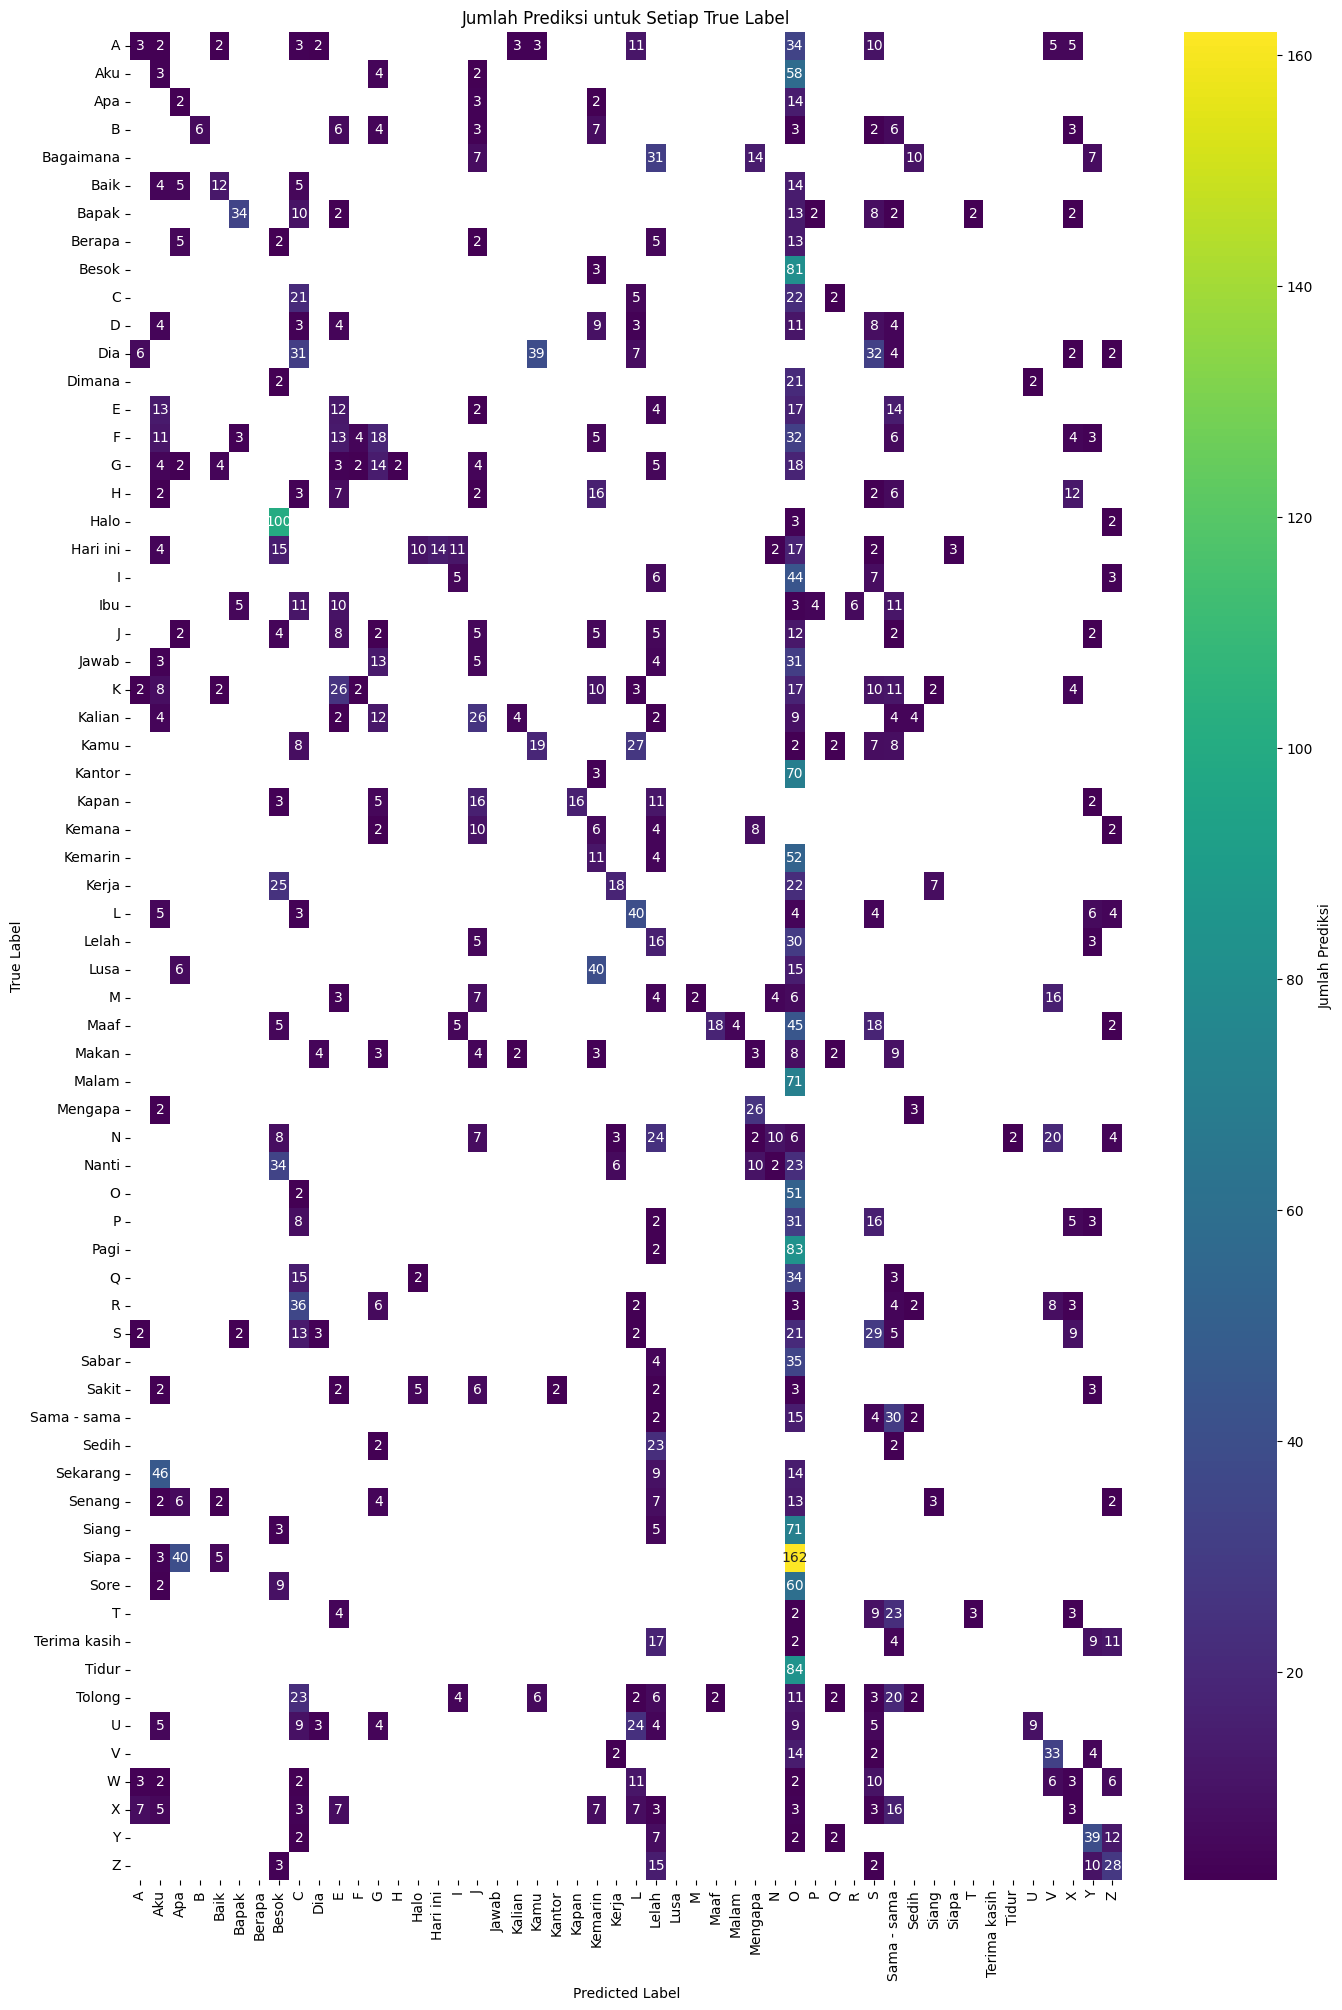

In [217]:
count_predictions = (
    eval_df.groupby(["true_kategorik", "predicted_kategorik"]).size().unstack(fill_value=0)
)
mask = count_predictions <= 1

plt.figure(figsize=(16, 24))
sns.heatmap(
    count_predictions,
    annot=True,
    fmt="d",
    cmap="viridis",
    mask=mask,
    cbar_kws={"label": "Jumlah Prediksi"},
)
plt.title("Jumlah Prediksi untuk Setiap True Label")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

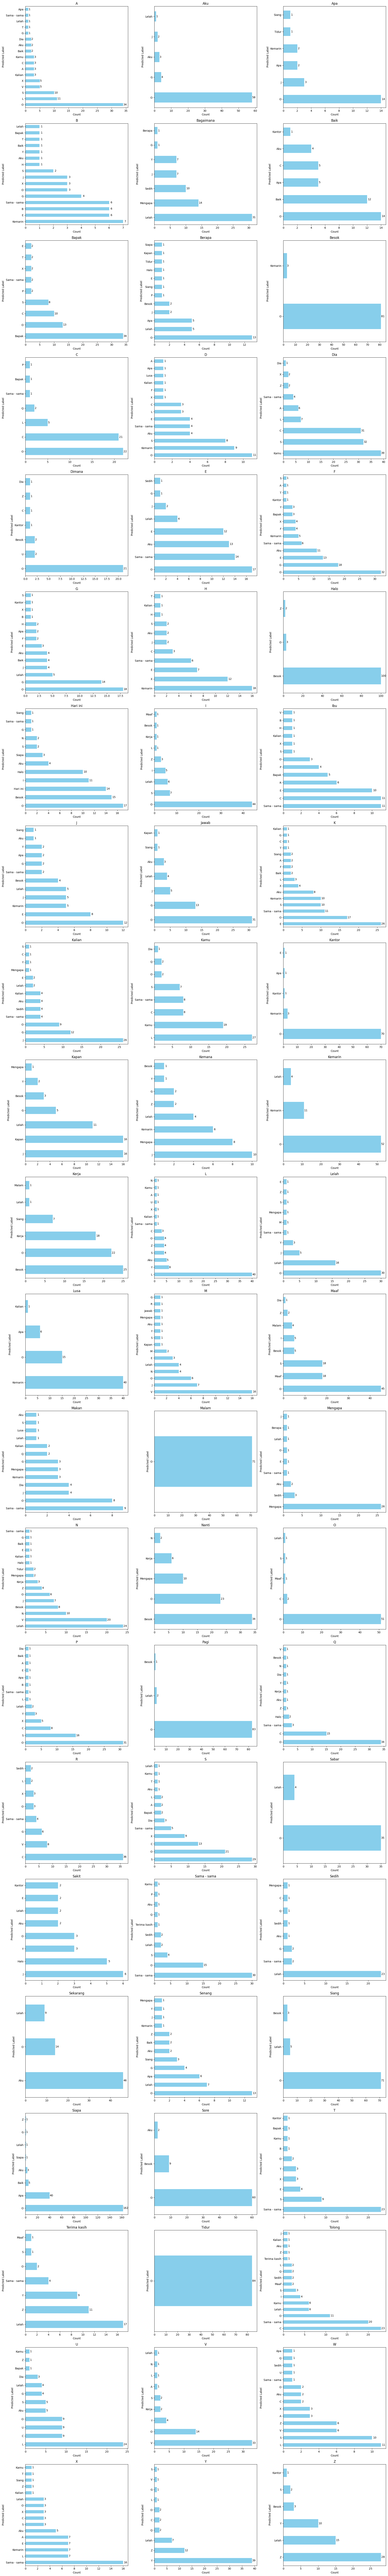

In [218]:
count_predictions = (
    eval_df.groupby(["true_kategorik", "predicted_kategorik"]).size().unstack(fill_value=0)
)

num_classes = count_predictions.shape[0]
num_cols = 3
num_rows = (num_classes + num_cols - 1) // num_cols  # Pembulatan ke atas

# Membuat plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
axes = np.array(axes).flatten()

# Plot untuk setiap true_kategorik
plot_count = 0
for i, true_kategorik in enumerate(count_predictions.index):
    # Filter hanya untuk nilai-nilai yang memiliki frekuensi lebih dari nol dan nilai prediksi tidak sama dengan true label
    data_to_plot = count_predictions.loc[true_kategorik][
        (count_predictions.loc[true_kategorik] > 0)
        & (count_predictions.columns != true_kategorik)
    ]
    if not data_to_plot.empty and not data_to_plot.eq(0).all():
        ax = axes[plot_count]
        # Mengganti label angka dengan label kategorikal yang sesuai dari DataFrame eval_df
        eval_data_to_plot = eval_df[eval_df["true_kategorik"] == true_kategorik][
            "predicted_kategorik"
        ].value_counts()
        eval_data_to_plot.plot(
            kind="barh", ax=ax, color="skyblue"
        )  # Mengubah menjadi plot horizontal ('barh')
        ax.set_xlabel("Count")
        ax.set_ylabel("Predicted Label")  # Mengganti label sumbu x dan y
        ax.set_title(
            f'{eval_df[eval_df["true_kategorik"] == true_kategorik]["true_kategorik"].iloc[0]}'
        )

        # Menambahkan label angka di sebelah kanan diagram
        for j, v in enumerate(eval_data_to_plot.values):
            ax.text(v + 0.1, j, str(v), ha="left", va="center")

        plot_count += 1

# Menghapus axes yang kosong pada layout
for j in range(plot_count, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()